In [31]:
import pandas as pd
import numpy as np
#import plotly.express as px
#import plotly.io as pio
#pio.templates.default = "plotly"
import matplotlib.pyplot as plt
#from plotly.subplots import make_subplots
#import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rc("figure", facecolor="white")
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [32]:
df20=pd.read_csv('data/2020-28thJuly_7cities.csv')
df19=pd.read_csv('data/2019ind.csv')
df20.head(5)

,Date,Country,City,Specie,count,min,max,median,variance
0,30/12/2019,IN,Bengaluru,co,232,1.6,28.6,8.6,228.74
1,31/12/2019,IN,Bengaluru,co,217,0.4,29.7,8.9,287.50
2,01/01/2020,IN,Bengaluru,co,180,1.2,40.2,9.8,246.08
3,02/01/2020,IN,Bengaluru,co,192,0.2,60.3,9.3,570.86
4,03/01/2020,IN,Bengaluru,co,237,0.7,86.4,8.0,523.38


In [33]:
city=['Bengaluru', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai']
df19=df19[df19['City'].isin(city)]
df20=df20[df20['City'].isin(city)]
print('19:',df19.City.unique())
print('20:',df20.City.unique())
print('19:',df19.Specie.unique())
print('20:',df20.Specie.unique())
#df19.Specie.value_counts()

19: ['Bengaluru' 'Chennai' 'Delhi' 'Kolkata' 'Mumbai']
20: ['Bengaluru' 'Chennai' 'Delhi' 'Kolkata' 'Mumbai']
19: ['co' 'dew' 'humidity' 'no2' 'o3' 'pm10' 'pm25' 'precipitation' 'pressure'
 'so2' 'temperature' 'wd' 'wind gust' 'wind speed' 'wind-gust'
 'wind-speed']
20: ['co' 'dew' 'humidity' 'no2' 'o3' 'pm10' 'pm25' 'pressure' 'so2'
 'temperature']


Create single df for both years

In [34]:
df = pd.concat([df19,df20])
df

,Date,Country,City,Specie,count,min,max,median,variance
0,01/01/2019,IN,Bengaluru,co,218,1.2,36.0,7.7,261.60
1,02/01/2019,IN,Bengaluru,co,217,0.9,35.9,7.0,405.96
2,03/01/2019,IN,Bengaluru,co,217,0.2,33.2,6.7,317.93
3,04/01/2019,IN,Bengaluru,co,206,0.1,36.0,7.8,369.57
4,05/01/2019,IN,Bengaluru,co,196,0.3,37.0,7.8,270.74
...,...,...,...,...,...,...,...,...,...
14040,24/07/2020,IN,Mumbai,temperature,260,22.3,30.6,28.0,18.91
14041,25/07/2020,IN,Mumbai,temperature,223,27.0,31.5,28.5,18.84
14042,26/07/2020,IN,Mumbai,temperature,218,25.6,31.5,28.0,20.34
14043,27/07/2020,IN,Mumbai,temperature,232,22.3,29.0,27.0,15.50


In [35]:
df.shape

(31667, 9)

Make sure dates are correct

In [36]:
#factor=['dew','humidity','pressure','temperature']
#df=df[df['Specie'].isin(factor)]
df.Date=pd.to_datetime(df.Date, format = '%d/%m/%Y')
df

,Date,Country,City,Specie,count,min,max,median,variance
0,2019-01-01,IN,Bengaluru,co,218,1.2,36.0,7.7,261.60
1,2019-01-02,IN,Bengaluru,co,217,0.9,35.9,7.0,405.96
2,2019-01-03,IN,Bengaluru,co,217,0.2,33.2,6.7,317.93
3,2019-01-04,IN,Bengaluru,co,206,0.1,36.0,7.8,369.57
4,2019-01-05,IN,Bengaluru,co,196,0.3,37.0,7.8,270.74
...,...,...,...,...,...,...,...,...,...
14040,2020-07-24,IN,Mumbai,temperature,260,22.3,30.6,28.0,18.91
14041,2020-07-25,IN,Mumbai,temperature,223,27.0,31.5,28.5,18.84
14042,2020-07-26,IN,Mumbai,temperature,218,25.6,31.5,28.0,20.34
14043,2020-07-27,IN,Mumbai,temperature,232,22.3,29.0,27.0,15.50


In [37]:
df.describe()

,count,min,max,median,variance
count,31667.000000,31667.000000,31667.000000,31667.000000,3.166700e+04
mean,267.310165,87.420201,183.807301,119.783421,1.674573e+04
std,257.099126,244.668753,311.788451,273.902815,2.509674e+05
min,2.000000,-2995.800000,0.400000,-6.000000,0.000000e+00
25%,94.000000,0.600000,23.500000,6.900000,6.142500e+01
50%,173.000000,6.000000,48.500000,21.500000,5.253800e+02
75%,264.000000,25.000000,132.000000,69.000000,3.300750e+03
max,1032.000000,1019.000000,2967.400000,1023.200000,2.741780e+07


In [80]:
df_temp=df[df['Specie'].isin(['temperature'])]
df_dew=df[df['Specie'].isin(['dew'])]
df_hum=df[df['Specie'].isin(['humidity'])]
df25 = df[df['Specie'].isin(['pm25'])]
df10 = df[df['Specie'].isin(['pm10'])]
dfno2= df[df['Specie'].isin(['no2'])]
dfso2= df[df['Specie'].isin(['so2'])]

In [81]:
df_temp_25=df_temp.merge(df25,on=['City','Date','Country'])
df_dew_25=df_dew.merge(df25,on=['City','Date','Country'])
d_hum_25=df_hum.merge(df25,on=['City','Date','Country'])
df_temp_10=df_temp.merge(df10,on=['City','Date','Country'])

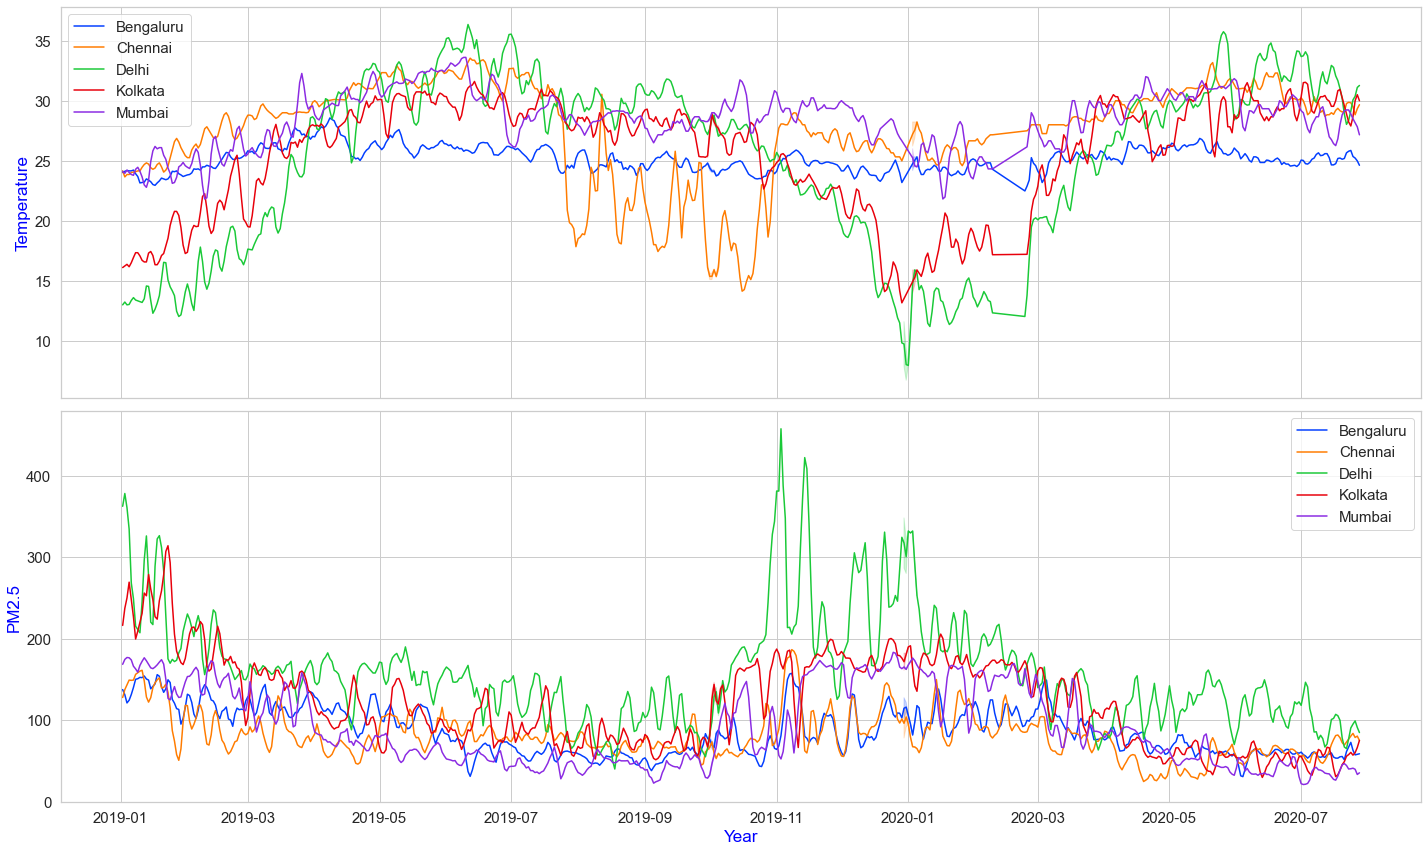

In [82]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(20,12),sharex=True)
for i in city:
    dff = df_temp[df_temp['City'].isin([i])]
    dft = df25[df25['City'].isin([i])]
    df_temp_roll = dff.rolling(window = 3, on= 'Date').mean()
    df25_roll = dft.rolling(window = 3, on= 'Date').mean()
    sns.lineplot(df_temp_roll.Date,df_temp_roll['median'],ax=ax1,label=i)
    sns.lineplot(df25_roll.Date,df25_roll['median'],ax=ax2,label=i)

#sns.lineplot(df_temp['Date'],df_temp['median'],hue=df_temp['City'],ax=ax1)
#sns.lineplot(df25['Date'],df25['median'],hue=df25['City'],ax=ax2)
ax1.set_xlabel('Year', fontsize=17,c='blue')
ax1.set_ylabel('Temperature', fontsize=17,c='blue')
ax1.tick_params(axis='both', which='major', labelsize=15)
#ax1.set_title('PM2.5',fontsize=20, c='blue')
ax2.set_xlabel('Year', fontsize=17,c='blue')
ax2.set_ylabel('PM2.5', fontsize=17,c='blue')
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
ax1.legend(fontsize=15,frameon=True)
ax2.legend(fontsize=15,frameon=True)
plt.show()
fig.savefig(f'images/temp_all_pm25.png',bbox_inches='tight')

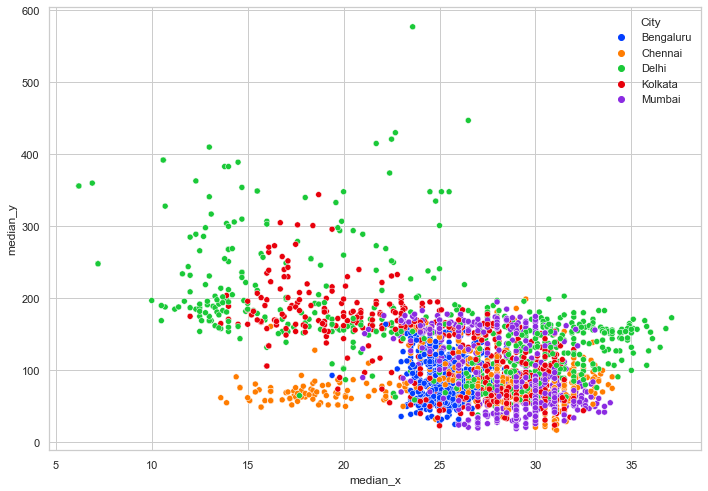

In [83]:
fig,ax = plt.subplots(1,1,figsize=(10,7))
sns.scatterplot(df_temp_25['median_x'],df_temp_25['median_y'],hue=df_temp_25['City'])
plt.tight_layout()
plt.show()

In [84]:
df19 = df_temp_25[df_temp_25.Date.dt.year == 2019]
df20 = df_temp_25[df_temp_25.Date.dt.year == 2020]
df1910 = df_temp_10[df_temp_10.Date.dt.year == 2019]
df2010 = df_temp_10[df_temp_10.Date.dt.year == 2020]

Text(0, 0.5, 'pm25')

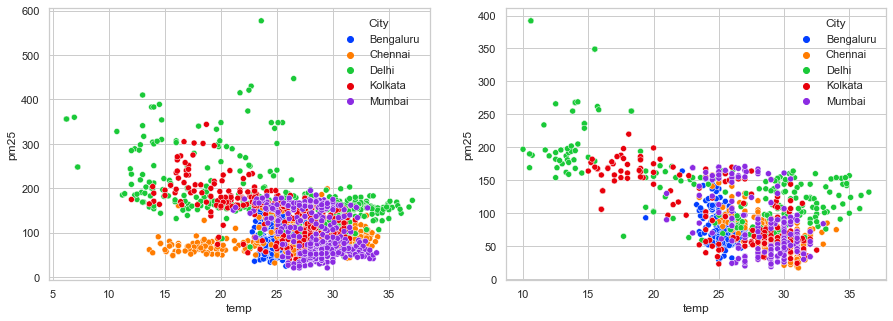

In [85]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5)) 
sns.scatterplot(df19['median_x'],df19['median_y'],hue=df19['City'],ax=ax1)
ax1.set_xlabel('temp')
ax1.set_ylabel('pm25')
sns.scatterplot(df20['median_x'],df20['median_y'],hue=df20['City'],ax=ax2)
ax2.set_xlabel('temp')
ax2.set_ylabel('pm25')

Text(0, 0.5, 'pm10')

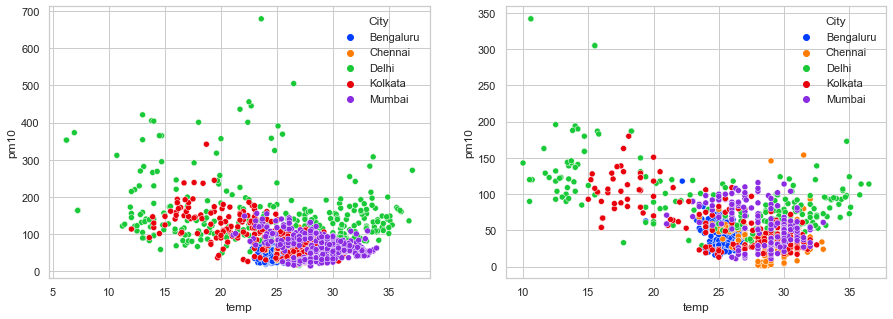

In [86]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5)) 
sns.scatterplot(df1910['median_x'],df1910['median_y'],hue=df1910['City'],ax=ax1)
ax1.set_xlabel('temp')
ax1.set_ylabel('pm10')
sns.scatterplot(df2010['median_x'],df2010['median_y'],hue=df2010['City'],ax=ax2)
ax2.set_xlabel('temp')
ax2.set_ylabel('pm10')

In [87]:
df_temp_no2=df_temp.merge(dfno2,on=['City','Date','Country'])
df_dew_no2=df_dew.merge(dfno2,on=['City','Date','Country'])
d_hum_no2=df_hum.merge(dfno2,on=['City','Date','Country'])

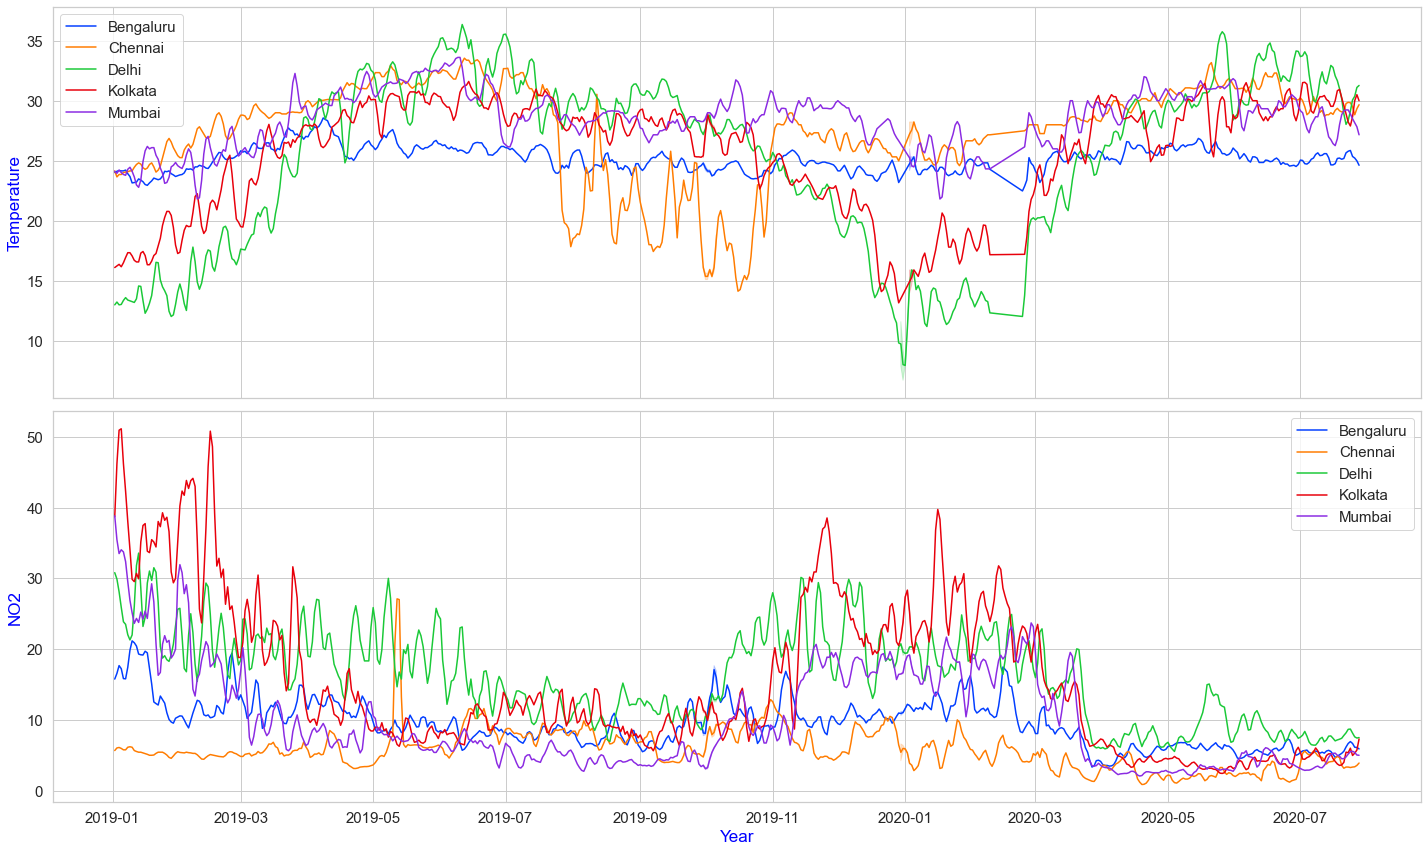

In [88]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(20,12),sharex=True)
for i in city:
    dff = df_temp[df_temp['City'].isin([i])]
    dft = dfno2[dfno2['City'].isin([i])]
    df_temp_roll = dff.rolling(window = 3, on= 'Date').mean()
    dfno2_roll = dft.rolling(window = 3, on= 'Date').mean()
    sns.lineplot(df_temp_roll.Date,df_temp_roll['median'],ax=ax1,label=i)
    sns.lineplot(dfno2_roll.Date,dfno2_roll['median'],ax=ax2,label=i)
#sns.lineplot(df_temp['Date'],df_temp['median'],hue=df_temp['City'],ax=ax1)
#sns.lineplot(dfno2['Date'],dfno2['median'],hue=dfno2['City'],ax=ax2)
ax1.set_xlabel('Year', fontsize=17,c='blue')
ax1.set_ylabel('Temperature', fontsize=17,c='blue')
ax1.tick_params(axis='both', which='major', labelsize=15)
#ax1.set_title('PM2.5',fontsize=20, c='blue')
ax2.set_xlabel('Year', fontsize=17,c='blue')
ax2.set_ylabel('NO2', fontsize=17,c='blue')
ax2.tick_params(axis='both', which='major', labelsize=15)
ax1.legend(fontsize=15,frameon=True)
ax2.legend(fontsize=15,frameon=True)
plt.tight_layout()
plt.show()
fig.savefig(f'images/temp_all_no2.png',bbox_inches='tight')

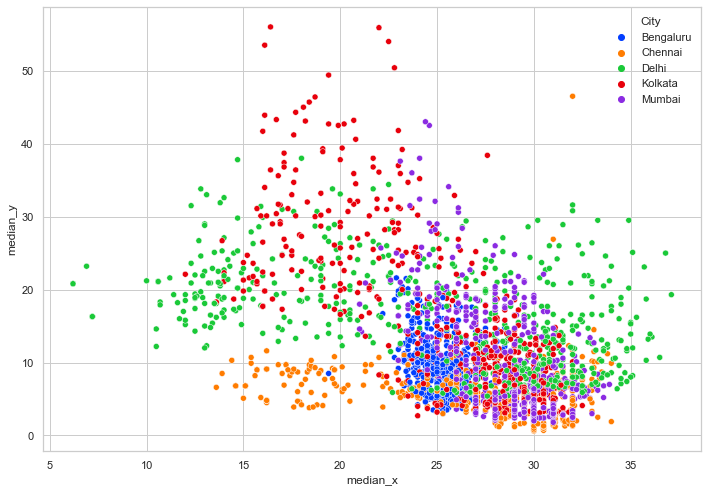

In [89]:
fig,ax = plt.subplots(1,1,figsize=(10,7))
sns.scatterplot(df_temp_no2['median_x'],df_temp_no2['median_y'],hue=df_temp_no2['City'])
plt.tight_layout()
plt.show()

In [90]:
df_temp_so2=df_temp.merge(dfso2,on=['City','Date','Country'])
df_dew_so2=df_dew.merge(dfso2,on=['City','Date','Country'])
df_hum_so2=df_hum.merge(dfso2,on=['City','Date','Country'])
dfno2

,Date,Country,City,Specie,count,min,max,median,variance
21857,2018-12-31,IN,Bengaluru,no2,216,3.0,54.9,16.1,1266.32
21858,2019-01-01,IN,Bengaluru,no2,234,4.1,57.6,14.4,1100.85
21859,2019-01-02,IN,Bengaluru,no2,224,3.5,46.7,16.8,1051.47
21860,2019-01-03,IN,Bengaluru,no2,228,4.7,69.5,18.5,1703.48
21861,2019-01-04,IN,Bengaluru,no2,214,4.7,51.6,17.7,1118.09
...,...,...,...,...,...,...,...,...,...
5443,2020-07-24,IN,Mumbai,no2,193,0.1,25.8,5.9,212.84
5444,2020-07-25,IN,Mumbai,no2,190,0.1,15.2,5.4,97.23
5445,2020-07-26,IN,Mumbai,no2,183,0.1,28.4,4.9,206.67
5446,2020-07-27,IN,Mumbai,no2,205,0.1,19.5,4.8,111.68


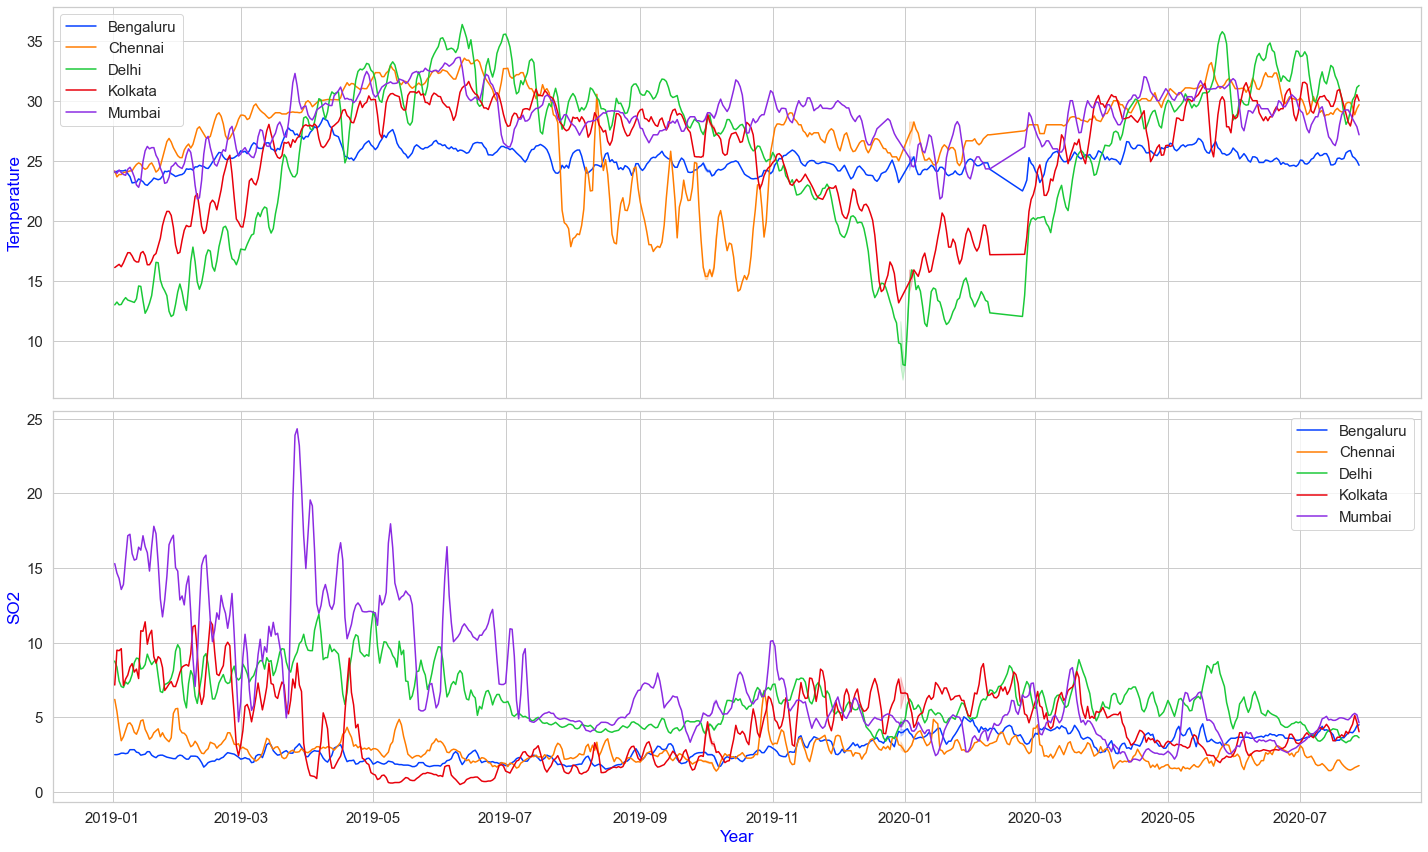

In [91]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(20,12),sharex=True)
for i in city:
    dff = df_temp[df_temp['City'].isin([i])]
    dft = dfso2[dfso2['City'].isin([i])]
    df_temp_roll = dff.rolling(window = 3, on= 'Date').mean()
    dfso2_roll = dft.rolling(window = 3, on= 'Date').mean()
    sns.lineplot(df_temp_roll.Date,df_temp_roll['median'],ax=ax1,label=i)
    sns.lineplot(dfso2_roll.Date,dfso2_roll['median'],ax=ax2,label=i)
#sns.lineplot(df_temp['Date'],df_temp['median'],hue=df_temp['City'],ax=ax1)
#sns.lineplot(dfso2['Date'],dfso2['median'],hue=dfso2['City'],ax=ax2)
ax1.set_xlabel('Year', fontsize=17,c='blue')
ax1.set_ylabel('Temperature', fontsize=17,c='blue')
ax1.tick_params(axis='both', which='major', labelsize=15)
#ax1.set_title('PM2.5',fontsize=20, c='blue')
ax2.set_xlabel('Year', fontsize=17,c='blue')
ax2.set_ylabel('SO2', fontsize=17,c='blue')
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
ax1.legend(fontsize=15,frameon=True)
ax2.legend(fontsize=15,frameon=True)
plt.show()
fig.savefig(f'images/temp_all_so2.png',bbox_inches='tight')

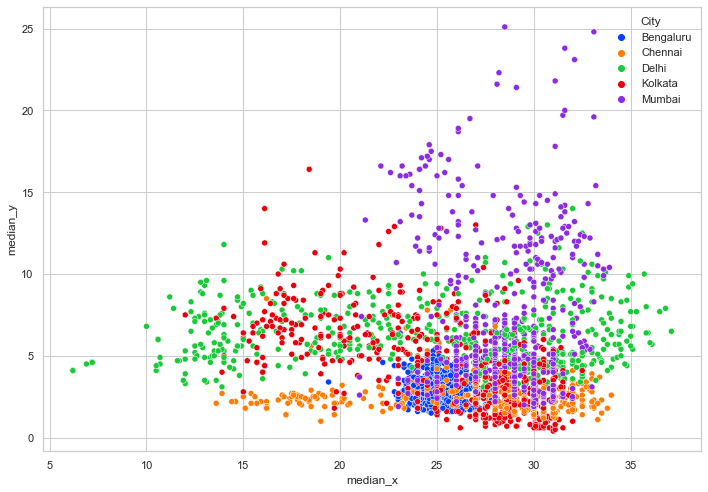

In [20]:
fig,ax = plt.subplots(1,1,figsize=(10,7))
sns.scatterplot(df_temp_so2['median_x'],df_temp_so2['median_y'],hue=df_temp_so2['City'])
plt.tight_layout()
plt.show()

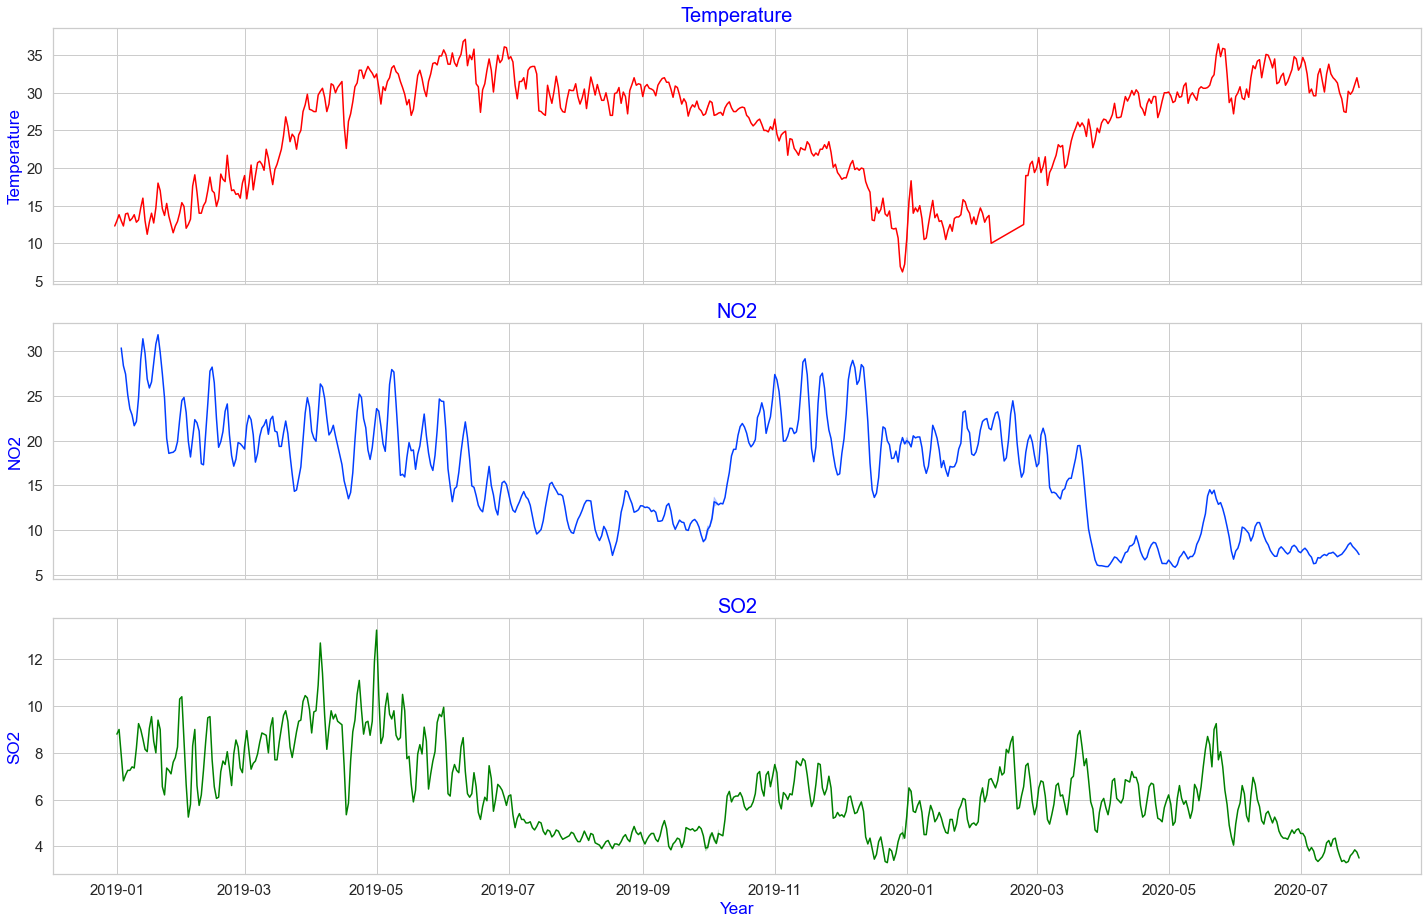

nan

In [21]:
df_temp_delhi=df_temp[df_temp['City'].isin(['Delhi'])]
dfso2_delhi = dfso2[dfso2['City'].isin(['Delhi'])]
dfno2_delhi = dfno2[dfno2['City'].isin(['Delhi'])]
df_temp_delhi_roll = df_temp_delhi.rolling(window=4,on='Date').mean()
dfso2_delhi_roll = dfso2_delhi.rolling(window=2, on='Date').mean()
dfno2_delhi_roll = dfno2_delhi.rolling(window=4, on='Date').mean()
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(20,13),sharex=True)
sns.lineplot(df_temp_delhi['Date'],df_temp_delhi['median'],ax=ax1,color='red')
sns.lineplot(dfso2_delhi_roll['Date'],dfso2_delhi_roll['median'],ax=ax3,color='green')
sns.lineplot(dfno2_delhi_roll['Date'],dfno2_delhi_roll['median'],ax=ax2)
ax1.set_xlabel('Year', fontsize=17,c='blue')
ax1.set_ylabel('Temperature', fontsize=17,c='blue')
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.set_xlabel('Year', fontsize=17,c='blue')
ax2.set_ylabel('NO2', fontsize=17,c='blue')
ax2.tick_params(axis='both', which='major', labelsize=15)
ax3.set_xlabel('Year', fontsize=17,c='blue')
ax3.set_ylabel('SO2', fontsize=17,c='blue')
ax3.tick_params(axis='both', which='major', labelsize=15)
ax1.set_title('Temperature',fontsize=20, c='blue')
ax2.set_title('NO2',fontsize=20, c='blue')
ax3.set_title('SO2',fontsize=20, c='blue')
plt.tight_layout()
plt.show()
df_temp_delhi_roll
fig.savefig(f'images/temp_delhi_no2_so2.png',bbox_inches='tight')
df_temp_delhi['median'].corr(dfso2_delhi['median'])

In [22]:
no2=[]
so2=[]
pm25=[]
for i in city:
    dfcity = df[df['City'].isin([i])]
    dfcity = dfcity.drop_duplicates()
    dfcityp = dfcity.pivot(index='Date',columns='Specie',values='median')
    no2.append(dfcityp['temperature'].corr(dfcityp['no2']))
    so2.append(dfcityp['temperature'].corr(dfcityp['so2']))
    pm25.append(dfcityp['temperature'].corr(dfcityp['pm25']))
dt = list(zip(city,no2,so2,pm25))
corr=pd.DataFrame(dt, columns=['City','NO2','SO2','PM2.5'])
cm = sns.light_palette("green", as_cmap=True)

s = corr.style.background_gradient(cmap='viridis')
s

,City,NO2,SO2,PM2.5
0,Bengaluru,-0.204679,-0.133644,-0.024886
1,Chennai,-0.219785,-0.111693,-0.107653
2,Delhi,-0.473253,-0.034795,-0.528701
3,Kolkata,-0.756631,-0.634203,-0.711492
4,Mumbai,-0.536066,-0.047804,-0.418386


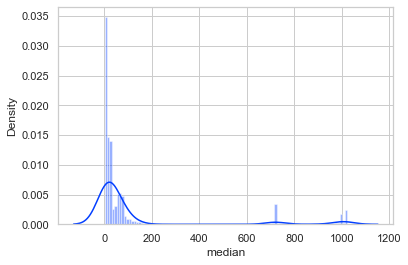

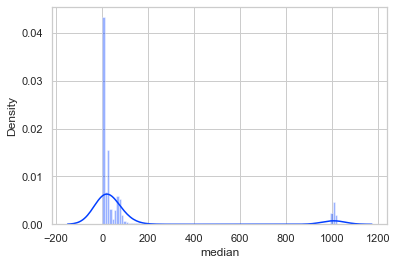

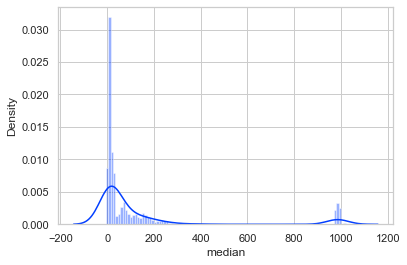

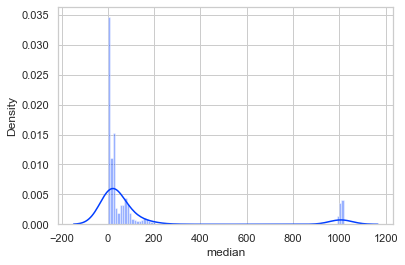

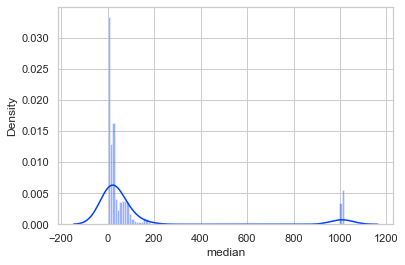

In [24]:
df.columns

Index(['Date', 'Country', 'City', 'Specie', 'count', 'min', 'max', 'median',
       'variance'],
      dtype='object')

In [25]:
#Feature Scaling
S = StandardScaler()
df_demo = S.fit_transform(df_demo)
pd.DataFrame(df_demo,columns=x)

,count,min,max,median,variance
0,-0.191797,-0.352401,-0.474070,-0.409215,-0.065683
1,-0.195687,-0.353627,-0.474391,-0.411771,-0.065108
2,-0.195687,-0.356488,-0.483051,-0.412866,-0.065459
3,-0.238473,-0.356897,-0.474070,-0.408850,-0.065253
4,-0.277369,-0.356080,-0.470863,-0.408850,-0.065647
...,...,...,...,...,...
31662,-0.028434,-0.266161,-0.491390,-0.335100,-0.066650
31663,-0.172349,-0.246951,-0.488503,-0.333275,-0.066651
31664,-0.191797,-0.252673,-0.488503,-0.335100,-0.066645
31665,-0.137343,-0.266161,-0.496522,-0.338751,-0.066664


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)